In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [2]:
df = pd.read_csv('../data/cleaned/filtered_df.csv')
df.head()

,Customer ID,MonetaryValue,Frequency,LastPurchase,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


In [3]:
scaled_df = pd.read_csv('../data/cleaned/scaled.csv')
scaled_df.head()

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700


Checking for the good k value by iterating over a set of k values from 2 to 12

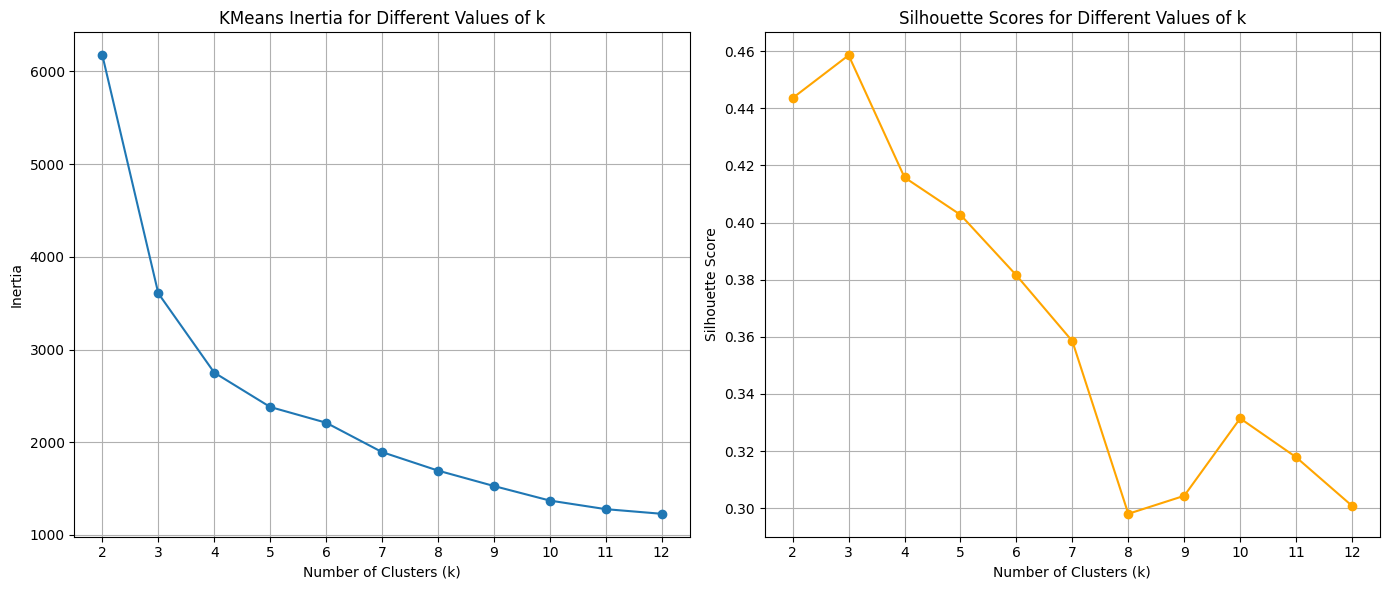

In [4]:
max_k = 12
inertia =[]
sil_scores = []
k_values = range(2, max_k+1)


for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, cluster_labels)
    sil_scores.append(sil_score)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


As we can see in the Inertia plot the optimal K value can be from 4 to 5 but from the silhoutte score plot for the k value of 4 is good than 5, so the optimal k value is 4.

In [5]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [6]:
df['Cluster'] = cluster_labels
df.head()

,Customer ID,MonetaryValue,Frequency,LastPurchase,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


In [7]:
sil_score = silhouette_score(scaled_df, cluster_labels)
print(sil_score)

0.4158069587875063


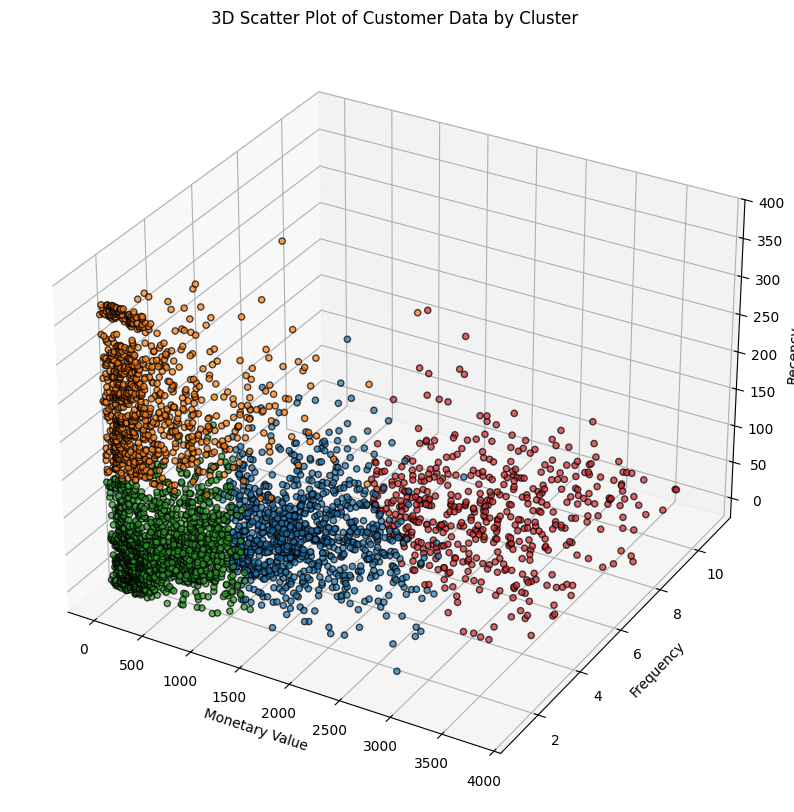

In [8]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df['MonetaryValue'], 
                     df['Frequency'], 
                     df['Recency'], 
                     c=colors, 
                     marker='o', alpha=0.7, edgecolors='black')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

##### **Cluster 0 (Blue): "Loyal & Engaged"**
**Interpretation**: This segment represents your core customer base. They demonstrate consistent engagement with a mid-to-high purchase frequency and a respectable mid-level monetary contribution. Their lower recency indicates they've made a purchase relatively recently, solidifying their current active status. These customers likely appreciate the value your product or service offers and have developed a routine of interacting with your business.

**Recommendations**:

- **Retention & Loyalty Programs**: Implement exclusive loyalty programs, tiered rewards, or early access to new products/features to further incentivize their continued patronage and make them feel valued.

- **Personalized Communications**: Tailor communications (e.g., newsletters, product recommendations) based on their past purchase history and preferences to deepen their engagement and encourage repeat purchases.

- **Feedback & Advocacy**: Encourage them to provide feedback, participate in surveys, or become brand advocates through referral programs. Their positive experiences can be powerful testimonials.

##### **Cluster 1 (Orange): "At-Risk & Dormant"**
**Interpretation**: This cluster comprises customers who are showing clear signs of disengagement. Their low monetary value, low frequency, and high recency suggest they haven't made a purchase in a significant amount of time and likely had a limited interaction with your business even when they were active. They are either on the verge of churning or have already become inactive.

**Recommendations**:

- **Re-engagement Campaigns**: Develop targeted re-engagement campaigns with compelling offers, discounts, or highlighting new product features that might rekindle their interest. Consider "we miss you" emails or personalized outreach.
- **Win-Back Incentives**: Offer irresistible incentives for a return purchase, such as significant discounts on their next order or exclusive access to limited-time promotions.



##### **Cluster 2 (Green): "Occasional Buyers"**
**Interpretation**: These customers represent individuals who have made a purchase or two but lack the consistent engagement of your loyal customers. Their lower monetary value and frequency, coupled with mid-level recency, suggest they might be price-sensitive, seasonal buyers, or simply exploring options. They are not entirely inactive but also not deeply committed.

**Recommendations**:

- **Product Discovery & Upselling**: Introduce them to a wider range of your offerings, perhaps through personalized recommendations based on their initial purchases. Consider bundles or complementary products.
- **Value Proposition Reinforcement**: Reiterate the unique benefits and value of your products/services to encourage them to consider your business for future needs.
- **Targeted Promotions**: Offer specific promotions or discounts on items that align with their past purchases or Browse behavior to encourage another transaction.

##### **Cluster 3 (Red): "Champions & VIPs"**
**Interpretation**: This is your most valuable customer segment. They exhibit exceptional engagement with high frequency, contribute significantly to your revenue with high monetary value, and have made recent purchases, indicating strong current activity. These customers are highly satisfied, brand loyal, and likely to be your biggest advocates.

**Recommendations**:

- **VIP Treatment**: Provide exclusive benefits, priority customer service, or early access to new products/services to acknowledge their importance and reinforce their loyalty.
- **Personalized Appreciation**: Send personalized thank-you notes, small gifts, or offer special recognition for their continued support.
- **Referral Programs**: Leverage their enthusiasm by encouraging them to participate in referral programs, turning them into powerful brand evangelists.
- **Solicit Feedback for Innovation**: Engage them in product development or service improvement discussions. Their insights are invaluable for future growth.

In [19]:
df.iloc[18]['Customer ID']

np.float64(12373.0)

In [16]:
df[df['Cluster']== 1].index

Index([   0,    7,   13,   14,   16,   18,   22,   30,   33,   37,
       ...
       3777, 3780, 3781, 3790, 3794, 3796, 3797, 3801, 3803, 3806],
      dtype='int64', length=902)

In [ ]:
joblib.dump(kmeans, '../app/utils/model.pkl')

['../app/utils/model.pkl']